In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
Young_Mod, v, sigma_y = 2e5, 0.3, 250

E = (Young_Mod/(1-v**2))*np.array([[1, v, 0],
                                   [v, 1, 0],
                                   [0, 0, (1-v)/2] ])

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 10, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 75, 30

In [3]:
# strain rate vector
# strain rate as seen in the graph
strain_rate = np.array([[3e-2/(2500/8)],
                        [0],
                        [0] ])

# maximum strain in x direction
strain_x_max = np.array([[3e-2],
                        [0],
                        [0] ])

# inital length of bar [m]
l_0 = 1

time_to_strain_x_max = strain_x_max[0,0]/(strain_rate[0]*l_0)[0]

#print(time_to_strain_x_max*8)
#>> 2500 [s]

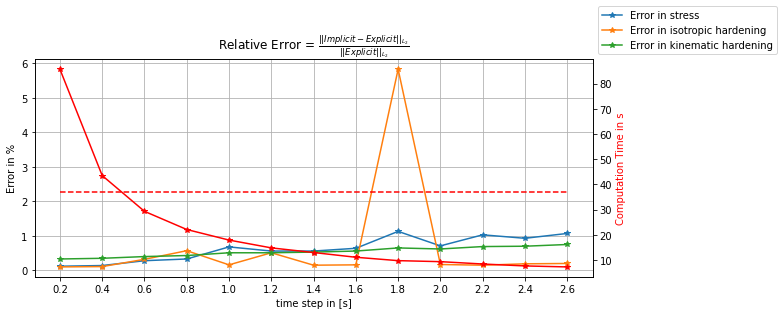

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(various_delta_t, err[:,0], '*-', label = "Error in stress")
ax.plot(various_delta_t, err[:,1], '*-', label = "Error in isotropic hardening")
ax.plot(various_delta_t, err[:,2], '*-', label = "Error in kinematic hardening")

ax_twin = ax.twinx()
ax_twin.plot(various_delta_t, computation_time, '*-', color = "red")
ax_twin.set_ylabel(r'Computation Time in s', color="red")
ax_twin.hlines(y = 37, xmin = various_delta_t[0], xmax = various_delta_t[-1], color = "red", linestyles = '--')

ax.set_xlabel('time step in [s]')
ax.set_xticks(various_delta_t)
ax.set_ylabel(r'Error in %')
ax.legend(bbox_to_anchor=(1,1), loc="lower left")
ax.set_title(r"Relative Error = $\frac{||Implicit-Explicit||_{{L}_2}}{||Explicit||_{{L}_2}}$")
ax.grid()

plt.show()